# Etude sur les defauts de paiements

### Importation du jeu de donnée et presentation du jeu de donnée

In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df= pd.read_csv("D:/Projet road Natacha/Projet de defaut de paiement de carte/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Analyse Exploratoire du jeu de donnée

Nature des données

In [7]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Verification des donées manquantes

In [9]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Le jeu de donnée ne présente pas de données manquantes 

Traitement des variables pay de sorte à avoir de nouvelles varaibles plus explicites

In [12]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# nb_mois_retard : mois avec un vrai retard (valeurs > 0)
df['nb_mois_retard'] = df[pay_cols].apply(lambda row: sum(row > 0), axis=1)

# max_retard : sévérité maximale (valeur maximale, même si négative)
df['max_retard'] = df[pay_cols].max(axis=1)

# tendance_retard : évolution des retards entre PAY_6 et PAY_0
df['tendance_retard'] = df['PAY_0'] - df['PAY_6']

In [13]:
df['max_retard'].head(20)

0     2
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     2
9    -1
10    2
11    2
12    0
13    2
14    0
15    2
16    2
17    0
18    1
19    1
Name: max_retard, dtype: int64

Nous remarquons que le client 9 n'a aucun defaut de paiement et est donc un bon payeur ceux avec 0 n'ont pas de defaut 

In [15]:
df.drop(columns=['ID','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,nb_mois_retard,max_retard,tendance_retard
0,20000.0,2,2,1,24,3913.0,3102.0,689.0,0.0,0.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,2,2,4
1,120000.0,2,2,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2,2,-3
2,90000.0,2,2,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0
3,50000.0,2,2,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0
4,50000.0,1,2,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,188948.0,192815.0,208365.0,88004.0,31237.0,...,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,0
29996,150000.0,1,3,2,43,1683.0,1828.0,3502.0,8979.0,5190.0,...,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,-1
29997,30000.0,1,2,2,37,3565.0,3356.0,2758.0,20878.0,20582.0,...,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,3,4,4
29998,80000.0,1,3,1,41,-1645.0,78379.0,76304.0,52774.0,11855.0,...,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1,1,2


In [16]:
def comportement_paiement(row):
    total = partiel = non_paye = 0
    for i in range(1, 7):
        bill = row[f'BILL_AMT{i}']
        pay = row[f'PAY_AMT{i}']
        if pay >= bill:
            total += 1
        elif 0 < pay < bill:
            partiel += 1
        elif pay == 0:
            non_paye += 1
    return pd.Series([total, partiel, non_paye])

df[['nb_paiements_complets', 'nb_paiements_partiels', 'nb_paiements_absents']] = df.apply(comportement_paiement, axis=1)

In [17]:
df[['nb_paiements_complets', 'nb_paiements_partiels', 'nb_paiements_absents']]

,nb_paiements_complets,nb_paiements_partiels,nb_paiements_absents
0,3,1,2
1,0,4,2
2,0,6,0
3,0,6,0
4,1,5,0
...,...,...,...
29995,0,6,0
29996,4,1,1
29997,1,3,2
29998,2,4,0


Cette partie est faite pour montrer le nombre de mois ou le client à payer entierement, partiellement ou pas sa facture... elle consolide les variables PAY_AMT et BILL_AMT

In [19]:
df.drop(columns=[f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)], inplace=True)

In [20]:
df['EDUCATION'] = df['EDUCATION'].replace({
    0: 'autre',
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'autre',
    5: 'autre',
    6: 'autre'
})
df['SEX'] = df['SEX'].map({1: 'Homme', 2: 'Femme'})
df['MARRIAGE'] = df['MARRIAGE'].replace({
    0: 'autre',
    1: 'célibataire',
    2: 'marié(e)',
    3: 'autre'
})

### Analyse descrpitive

#### Résumé Numérique

In [23]:
df_num = df.select_dtypes(include=["int64", "float64"]).drop(columns=["default.payment.next.month"])
df_quali= df.select_dtypes(include=["object"])

In [24]:
df_num.describe()

,LIMIT_BAL,AGE,nb_mois_retard,max_retard,tendance_retard,nb_paiements_complets,nb_paiements_partiels,nb_paiements_absents
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,167484.322667,35.485500,0.834200,0.438733,0.274400,1.465700,3.84350,0.690800
std,129747.661567,9.217904,1.554303,1.345154,1.165683,1.854707,2.12732,0.987165
min,10000.000000,21.000000,0.000000,-2.000000,-7.000000,0.000000,0.00000,0.000000
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,4.00000,0.000000
75%,240000.000000,41.000000,1.000000,2.000000,1.000000,3.000000,6.00000,1.000000
max,1000000.000000,79.000000,6.000000,8.000000,7.000000,6.000000,6.00000,6.000000


In [25]:
for col in df_num :
    print(f"le skweness de {col} est ", df_num[col].skew())
    if df_num[col].skew()>0:
        print(f"{col} semble avoir une asymétrie à droite")
    elif df_num[col].skew()<0:
        print(f"{col} semble avoir une asymétrie à gauche")
    elif df_num[col].skew()==0 :
        print(f"{col} semble avoir une asymétrie normal") 
    print("\n")

le skweness de LIMIT_BAL est  0.992866960519544
LIMIT_BAL semble avoir une asymétrie à droite


le skweness de AGE est  0.7322458687830562
AGE semble avoir une asymétrie à droite


le skweness de nb_mois_retard est  2.1285802752997505
nb_mois_retard semble avoir une asymétrie à droite


le skweness de max_retard est  0.6890556821363953
max_retard semble avoir une asymétrie à droite


le skweness de tendance_retard est  0.41810975538124695
tendance_retard semble avoir une asymétrie à droite


le skweness de nb_paiements_complets est  0.9681921374331754
nb_paiements_complets semble avoir une asymétrie à droite


le skweness de nb_paiements_partiels est  -0.568180021357495
nb_paiements_partiels semble avoir une asymétrie à gauche


le skweness de nb_paiements_absents est  1.8921819162609805
nb_paiements_absents semble avoir une asymétrie à droite




In [26]:
for col in df_quali:
    print(f"Distribution de la variable {col} (effectifs) :")
    print(df_quali[col].value_counts())
    print(f"Distribution de la variable {col} (pourcentages) :")
    print(df_quali[col].value_counts(normalize=True) * 100)
    print("\n")

Distribution de la variable SEX (effectifs) :
SEX
Femme    18112
Homme    11888
Name: count, dtype: int64
Distribution de la variable SEX (pourcentages) :
SEX
Femme    60.373333
Homme    39.626667
Name: proportion, dtype: float64


Distribution de la variable EDUCATION (effectifs) :
EDUCATION
university         14030
graduate school    10585
high school         4917
autre                468
Name: count, dtype: int64
Distribution de la variable EDUCATION (pourcentages) :
EDUCATION
university         46.766667
graduate school    35.283333
high school        16.390000
autre               1.560000
Name: proportion, dtype: float64


Distribution de la variable MARRIAGE (effectifs) :
MARRIAGE
marié(e)       15964
célibataire    13659
autre            377
Name: count, dtype: int64
Distribution de la variable MARRIAGE (pourcentages) :
MARRIAGE
marié(e)       53.213333
célibataire    45.530000
autre           1.256667
Name: proportion, dtype: float64




#### Graphique

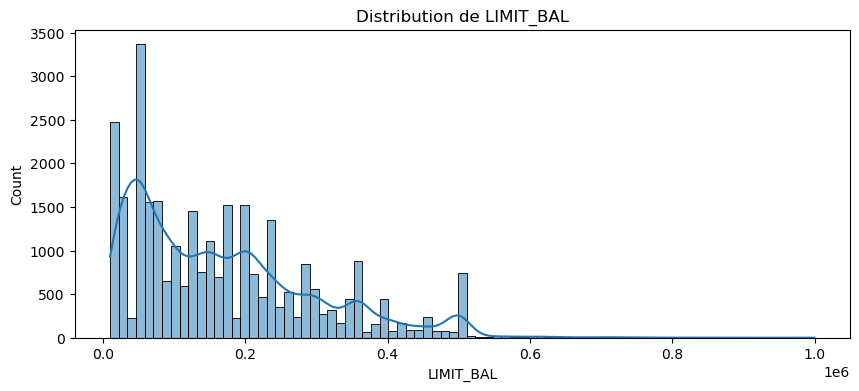

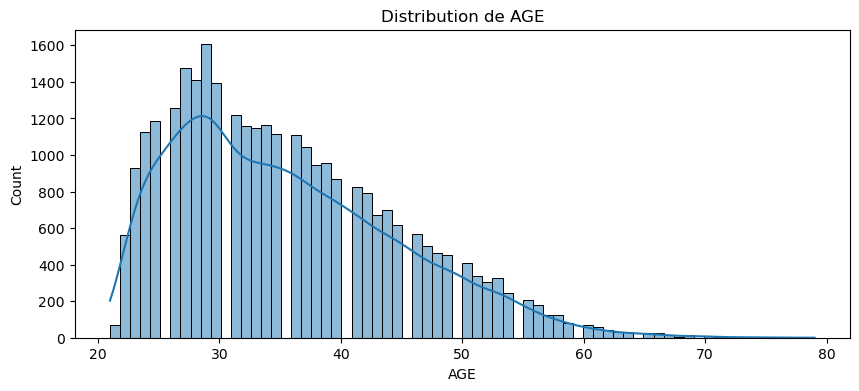

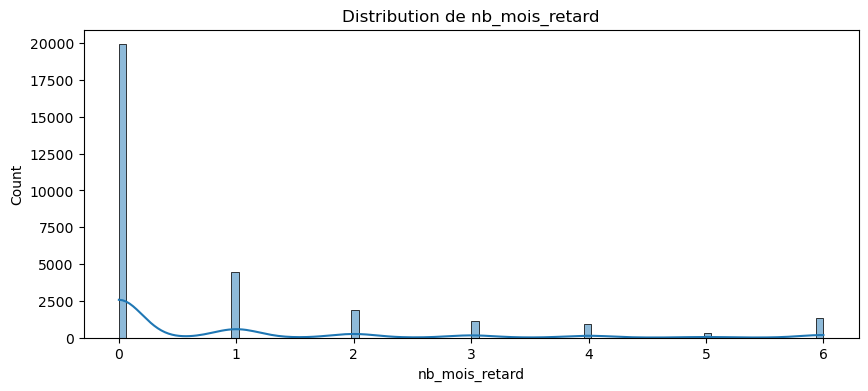

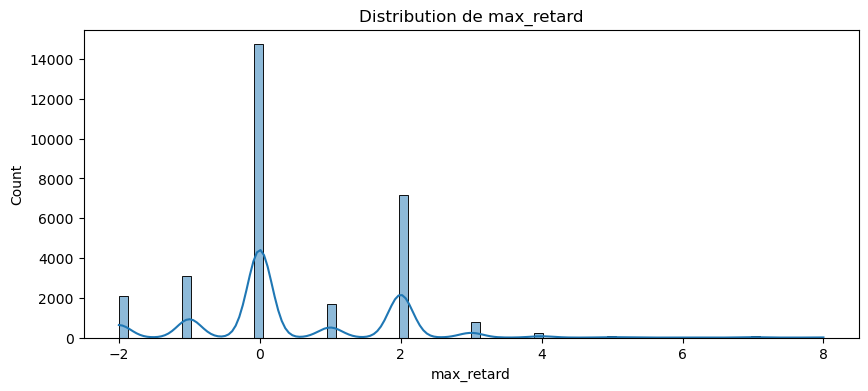

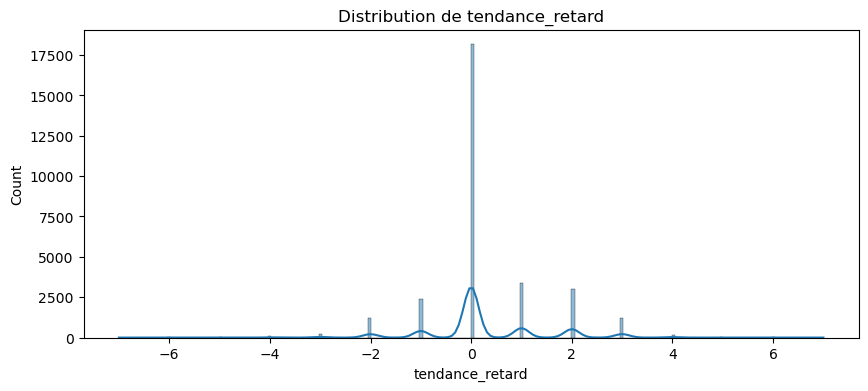

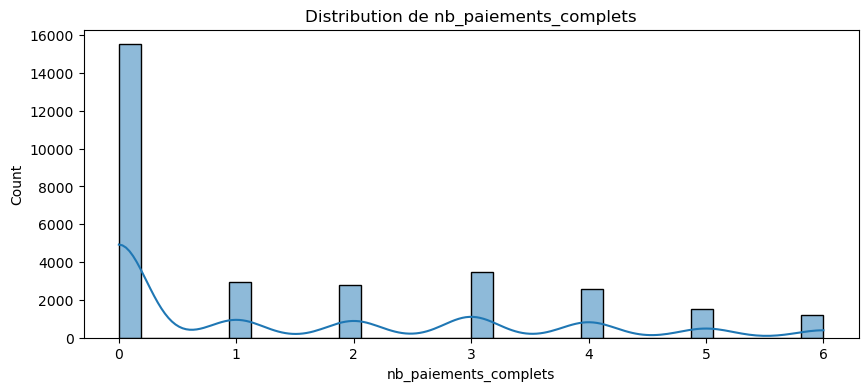

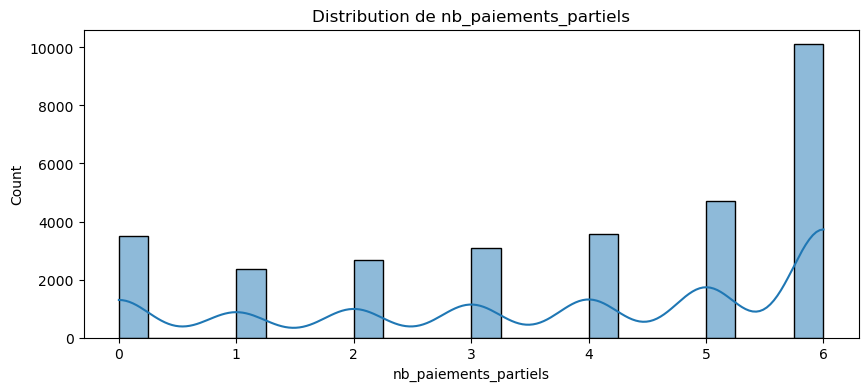

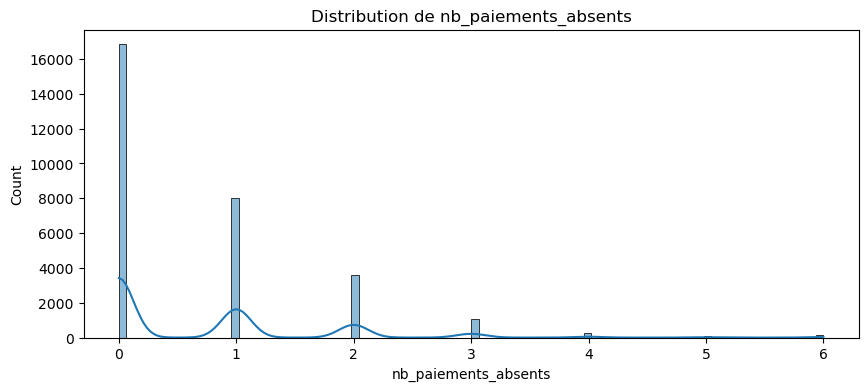

In [28]:
for col in df_num.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

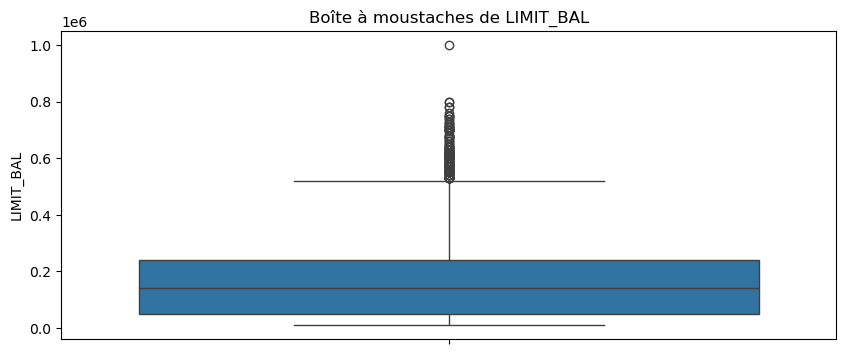

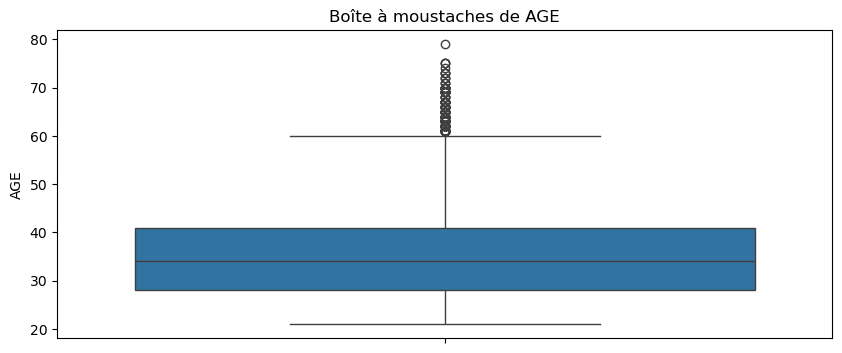

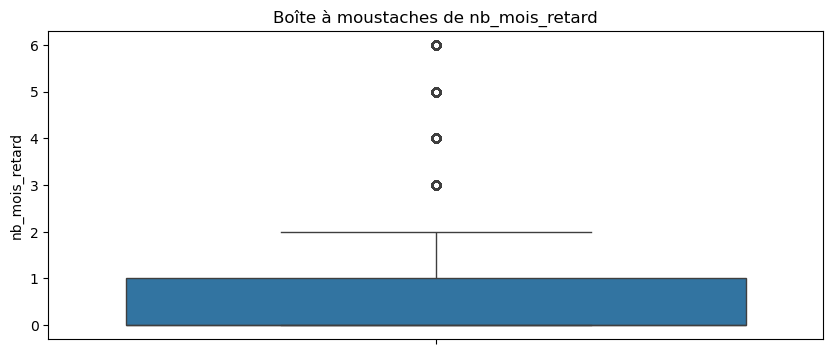

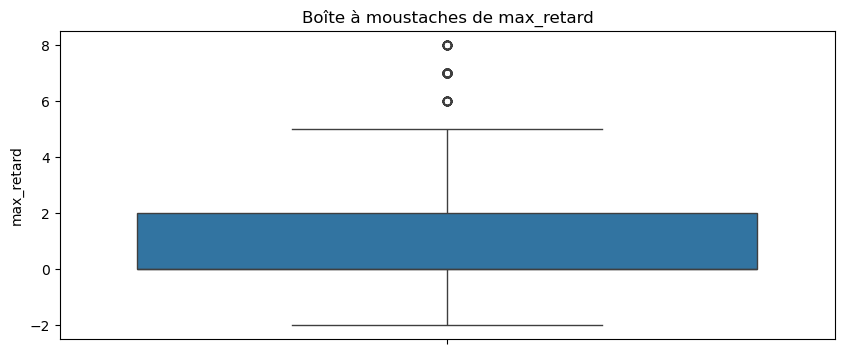

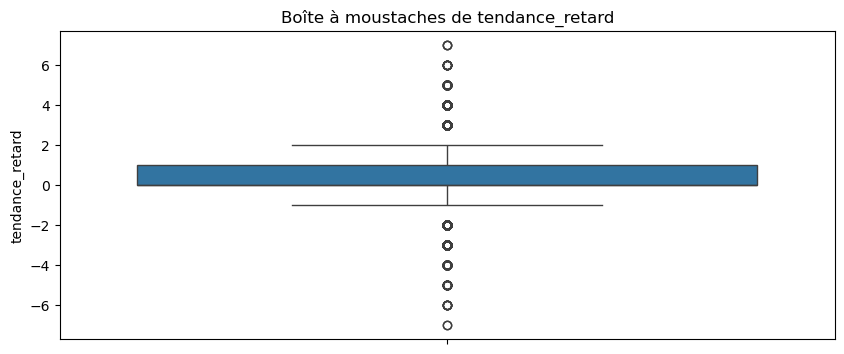

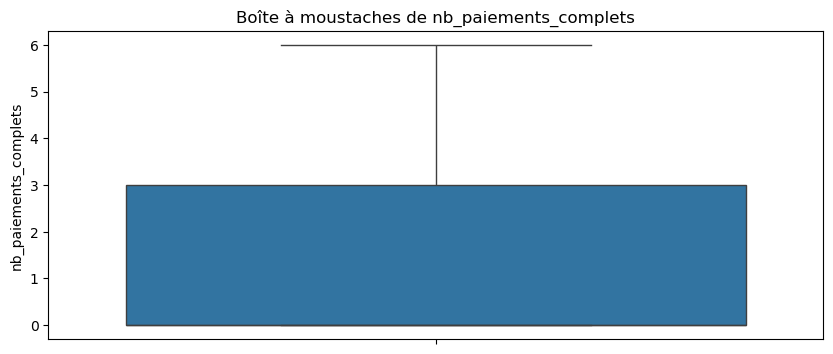

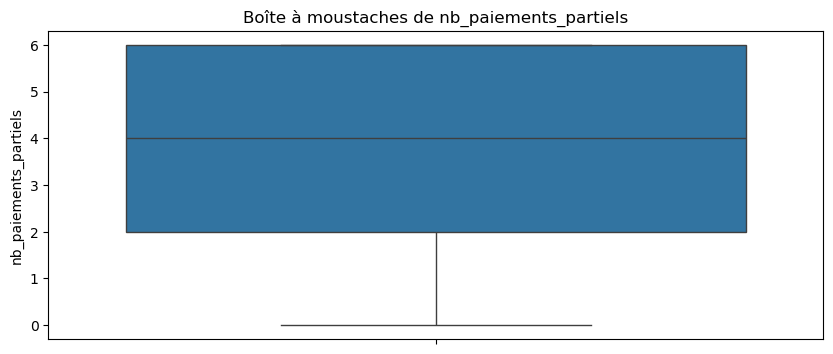

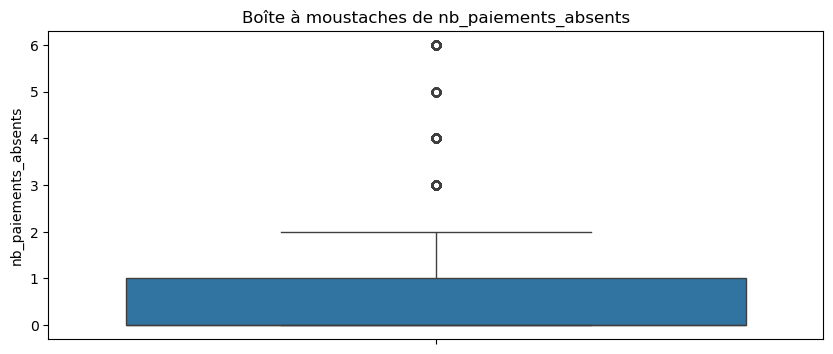

In [29]:
for col in df_num.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boîte à moustaches de {col}")
    plt.show()

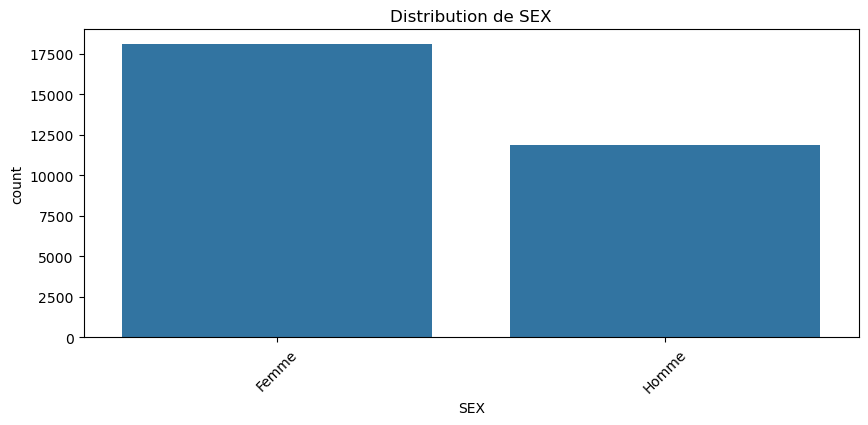

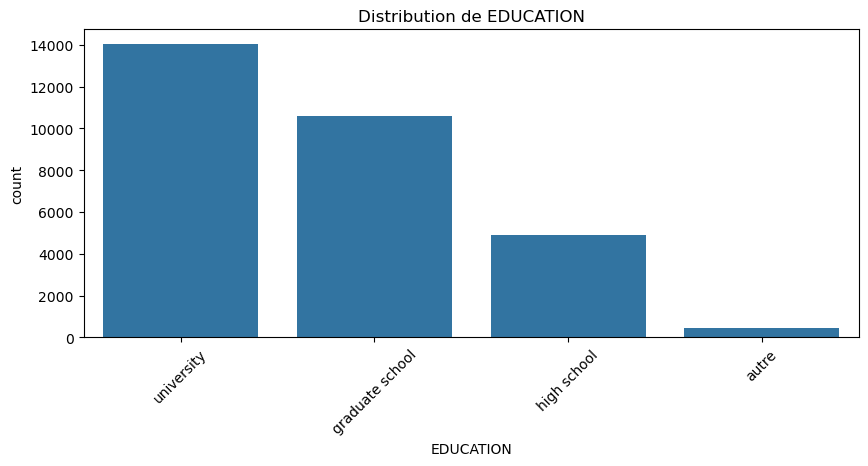

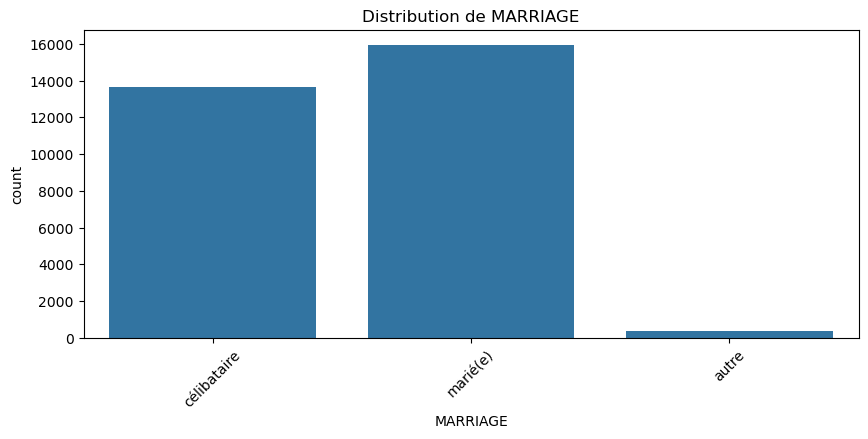

In [30]:
for col in df_quali.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

#### Relation avec la variable cible

In [32]:
def eta_squared(df, cat_col, num_cols):
    eta_results = {}
    for col in num_cols:
        groups = df.groupby(cat_col)[col]
        mean_total = df[col].mean()
        sct = ((df[col] - mean_total)**2).sum()
        sce = sum([len(group) * (group.mean() - mean_total)**2 for name, group in groups])
        eta = round(sce / sct, 4)
        eta_results[col] = eta
    return pd.Series(eta_results).sort_values(ascending=False)

# Sélection des variables numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('default.payment.next.month')

# Calcul de η² pour toutes les variables numériques par rapport à la variable cible
eta_scores = eta_squared(df, 'default.payment.next.month', num_cols)

# Affichage
print(eta_scores)

nb_mois_retard           0.1587
max_retard               0.1096
nb_paiements_absents     0.0546
LIMIT_BAL                0.0236
tendance_retard          0.0166
nb_paiements_partiels    0.0043
nb_paiements_complets    0.0024
AGE                      0.0002
dtype: float64


In [33]:
from scipy.stats import chi2_contingency

def test_chi2_qualitatives(df_quali, target):
    results = []
    for col in df_quali.columns:
        if col == target:
            continue  # On ne teste pas la variable cible avec elle-même
        table = pd.crosstab(df_quali[target], df_quali[col])
        try:
            chi2, p, dof, expected = chi2_contingency(table)
            results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})
        except ValueError as e:
            # En cas de problème (ex: table vide ou modalité unique), on l'ignore
            print(f"Impossible de tester {col}: {e}")

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('p-value')
    return results_df

# Exemple d'utilisation avec ta variable cible :
df_quali_with_target = df_quali.copy()
df_quali_with_target['default.payment.next.month'] = df['default.payment.next.month']

results_chi2 = test_chi2_qualitatives(df_quali_with_target, 'default.payment.next.month')
print(results_chi2)

    Variable        Chi2       p-value
1  EDUCATION  160.409951  1.495065e-34
0        SEX   47.708797  4.944679e-12
2   MARRIAGE   28.130325  7.790720e-07


### Analyse Econometrique

In [40]:
X = df[["SEX","EDUCATION","MARRIAGE","nb_mois_retard","max_retard","nb_paiements_absents"]]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
Y = df["default.payment.next.month"]
X= sm.add_constant(X)
model= sm.Logit(Y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.456813
         Iterations 7


In [42]:
print(result.summary())

                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29990
Method:                                   MLE   Df Model:                            9
Date:                        Thu, 15 May 2025   Pseudo R-squ.:                  0.1355
Time:                                11:49:43   Log-Likelihood:                -13704.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.7962      0.226    -12.345      0.000      -3.240      -2.352
nb_mois_retard        

les variables nb_paiements_absent et mariage etant non significatif nous allons les retirer

In [68]:
from sklearn.model_selection import train_test_split

# Séparation train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Ajustement du modèle sur train
model = sm.Logit(Y_train, X_train)
results = model.fit()

# Prédiction sur test
pred_probs_test = results.predict(X_test)

# Matrice de confusion sur test
threshold = 0.5
pred_labels_test = (pred_probs_test >= threshold).astype(int)
cm_test = confusion_matrix(Y_test, pred_labels_test)
print("Matrice de confusion (test) :\n", cm_test)

# AUC sur test
auc_test = roc_auc_score(Y_test, pred_probs_test)
print("AUC (test) :", auc_test)

Optimization terminated successfully.
         Current function value: 0.457144
         Iterations 6
Matrice de confusion (test) :
 [[6739  301]
 [1475  485]]
AUC (test) : 0.7262327516233766


In [70]:
print(results.summary())

                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20993
Method:                                   MLE   Df Model:                            6
Date:                        Thu, 15 May 2025   Pseudo R-squ.:                  0.1379
Time:                                12:09:58   Log-Likelihood:                -9600.0
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.6882      0.208    -12.900      0.000      -3.097      -2.280
nb_mois_retard        

#### Verification du modèle

#### Matrice de confustion , AUC et courbe ROC

Matrice de confusion (test) :
 [[6739  301]
 [1475  485]]
AUC (test) : 0.7262327516233766


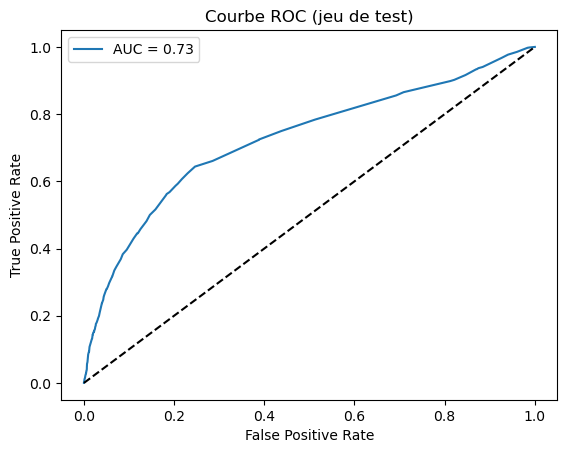

In [72]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Prédictions des probabilités sur le jeu de test
pred_probs_test = results.predict(X_test)  # result issu de model.fit() sur X_train, Y_train

# Seuil de classification (exemple 0.5)
threshold = 0.5
pred_labels_test = (pred_probs_test >= threshold).astype(int)

# Matrice de confusion sur test
cm_test = confusion_matrix(Y_test, pred_labels_test)
print("Matrice de confusion (test) :\n", cm_test)

# Calcul de l'AUC sur test
auc_test = roc_auc_score(Y_test, pred_probs_test)
print("AUC (test) :", auc_test)

# Courbe ROC sur test
fpr, tpr, thresholds = roc_curve(Y_test, pred_probs_test)
plt.plot(fpr, tpr, label=f'AUC = {auc_test:.2f}')
plt.plot([0,1], [0,1], 'k--')  # diagonale aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC (jeu de test)')
plt.legend()
plt.show()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcul du VIF pour chaque variable explicative (sans la constante)
X_no_const = X.drop(columns='const')

vif_data = pd.DataFrame()
vif_data["variable"] = X_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

print(vif_data)

                    variable       VIF
0             nb_mois_retard  2.996225
1                 max_retard  2.600830
2                  SEX_Homme  1.649575
3  EDUCATION_graduate school  1.329177
4      EDUCATION_high school  1.171492
5       EDUCATION_university  1.435390


cela signifie que les varibales ne sont pas corrélé entre elle 